# Initialization

In [49]:
import numpy as np
import math
import matplotlib.pyplot as plt
import time
X_array = []
cond_array = []
y_array = []
for i in range(5):
  np.random.seed(4)
  n = 200
  m = 100
  X = np.random.randn(n, m)
  high = (i)*3 + 1
  for i in range(2):
    c = np.random.randint(0,1)
    if c == 1:
      j = np.random.randint(0,m-1)
      X[:,j] = X[:,j]*high
    else:
      i = np.random.randint(0,m-1)
      X[i,:] = X[i,:]*high
  cond_array.append(np.linalg.cond(X.T@X))
  X_array.append(X)
  beta = np.ones(m)
  epsilon = np.random.randn(n)
  y = X@beta
  y_array.append(y)
print("Condition Numbers", cond_array)

Condition Numbers [28.197466292774177, 93.99886241677437, 264.8277419871637, 529.393433099227, 887.4333220130827]


In [50]:
theta_hat_array = []
for i in range(5):
  theta_hat = np.linalg.inv(X_array[i].T@X_array[i])@X_array[i].T@y_array[i]
  theta_hat_array.append(theta_hat)

In [51]:
def df(A,b,x):
    return (2/n)*(A.T@(A@x) - A.T@b)
def df_j(A,b,x,j):
    return (2/n)*np.dot(A[:,j],(A@x - b))
def step_size(A):
    eigenvalues, eigenvectors = np.linalg.eig(A.T@A)
    return n/(max(eigenvalues))

In [52]:
iter1 = 5000
iter = iter1*m
print("Iterations", iter)
error = np.zeros(iter)

Iterations 500000


# Step Size

In [53]:
t_array = []
for i in range(5):
  #t_array.append(step_size(X_array[i]))
  t_array.append(0.01)
t_array = [0.3, 0.1, 0.03, 0.015, 0.01]
print("Step Sizes", t_array)

Step Sizes [0.3, 0.1, 0.03, 0.015, 0.01]


# Cyclic Coordinate Descent

In [57]:
theta_k_array = []
for z in range(5):
  theta_k = np.zeros((m,iter))
  start_time = time.time()
  t = t_array[z]
  for i in range(iter1):
      for j in range(1,m+1):
          if (i)*m + j < iter:
              theta_k[:,(i)*m + j] = theta_k[:,(i)*m + j-1]
              theta_k[:,(i)*m + j][j-1] = theta_k[:,(i)*m + j-1][j-1] - t*(df_j(X_array[z],y_array[z],theta_k[:,(i*m + j-1)], j-1))
  end_time = time.time()
  elapsed_time = end_time - start_time
  print(f"Elapsed time: {elapsed_time} seconds")
  method = "Normal Cyclic"
  theta_k_array.append(theta_k.copy())

Elapsed time: 14.79886269569397 seconds
Elapsed time: 13.972950458526611 seconds
Elapsed time: 14.54526400566101 seconds
Elapsed time: 13.866920709609985 seconds
Elapsed time: 14.433182716369629 seconds


# Gradient Descent

In [55]:
theta_k_array = []
for z in range(5):
  theta_k = np.zeros((m,iter))
  start_time = time.time()
  t = t_array[z]
  for i in range(iter1):
      for j in range(1,m+1):
          if (i)*m + j < iter:
              theta_k[:,(i)*m + j] = theta_k[:,(i)*m + j-1] - t*(df(X_array[z],y_array[z],theta_k[:,(i*m + j-1)]))
  end_time = time.time()
  elapsed_time = end_time - start_time
  print(f"Elapsed time: {elapsed_time} seconds")
  method = "Regular Grad Descent"
  theta_k_array.append(theta_k.copy())

Elapsed time: 25.789395809173584 seconds
Elapsed time: 25.62056303024292 seconds
Elapsed time: 25.73375940322876 seconds
Elapsed time: 25.218122243881226 seconds
Elapsed time: 25.63086438179016 seconds


# Plotting Error over Iterations

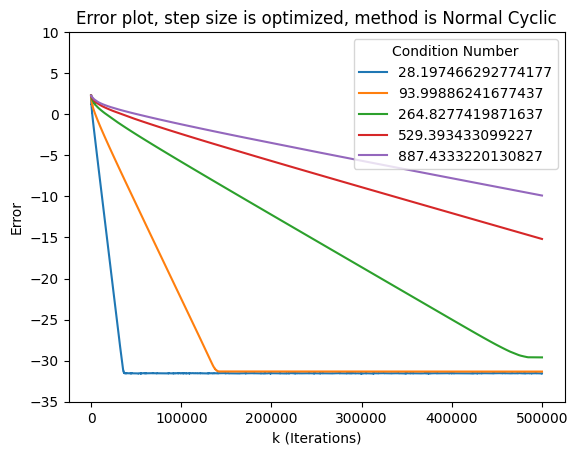

In [58]:
plt.figure()
for z in range(5):
  for i in range(iter):
      error[i] = np.log(np.linalg.norm(theta_k_array[z][:,i] - theta_hat_array[z]))
  plt.plot(np.linspace(1,iter+1, iter),error)
#plt.title("Error plot, step size is " + str(t) + ", method is " + method)
plt.title("Error plot, step size is optimized, method is " + method)
plt.xlabel("k (Iterations)")
plt.ylabel("Error")
plt.ylim(-35,10)
plt.legend(cond_array, title = "Condition Number")